In [1]:
library(ade4)
library(ggplot2)

fold <- paste(getwd(),"/",sep="")
db <- read.csv(paste(fold,"dataTrain_13_augmented.csv",sep=""))

Warning message:
"package 'ade4' was built under R version 3.6.3"

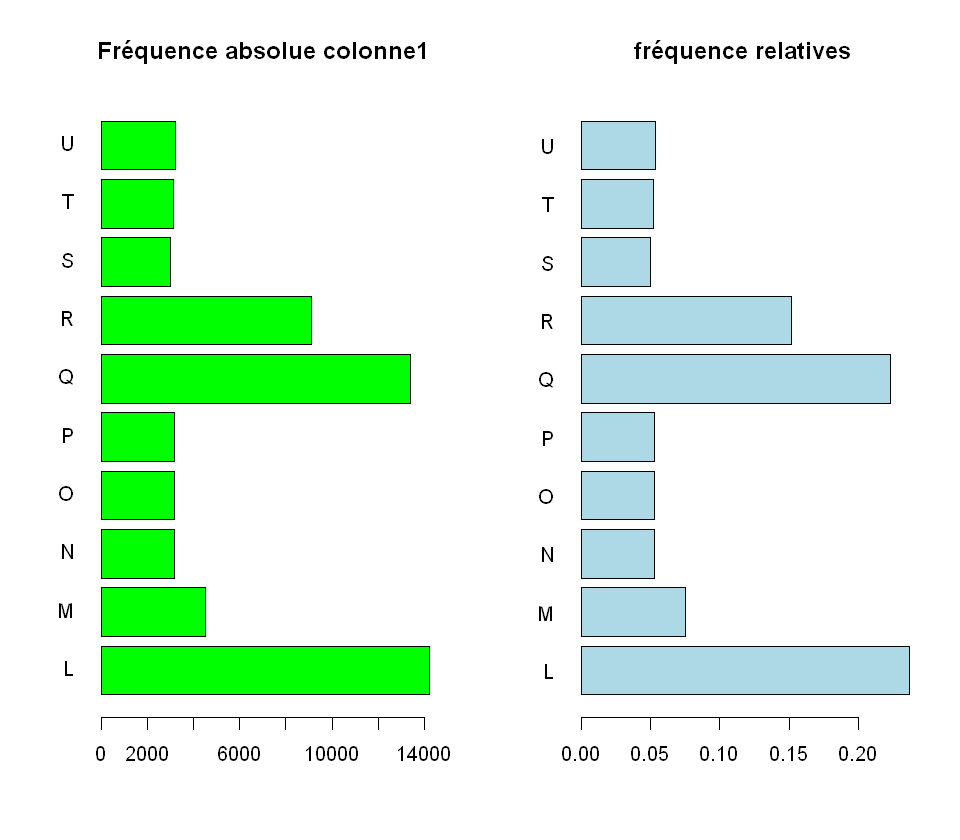

In [2]:
options(repr.plot.width=8, repr.plot.height=7)
par(mfrow=c(1,2))
barplot(summary(db[, c("region")]),main="Fréquence absolue colonne1",col="green",horiz=TRUE, las=1)
barplot(summary(db[, "region"])/length(db[, "region"]),horiz=TRUE,las=1,main="fréquence relatives",col="lightblue")

In [3]:
head(db)

X,id,gender,carType,carCategory,occupation,age,carGroup,bonus,carValue,material,subRegion,region,cityDensity,exposure,claimNumber,claimValue,catAge,catClaims,catDensity
1,1,Female,A,Small,Unemployed,20,10,-10,24355,0,N7,N,88.95152,355,0,0,u25,u500,u175
2,2,Male,E,Small,Employed,35,12,20,6410,1,S32,S,25.26138,365,0,0,u50,u500,u75
3,3,Female,D,Medium,Employed,31,8,130,18545,0,S24,S,23.10512,365,0,0,u32,u500,u75
4,4,Male,D,Large,Employed,29,13,-50,18015,1,M4,M,190.05156,299,0,0,u32,u500,p175
5,5,Male,B,Medium,Self-employed,33,11,150,12325,0,U12,U,54.93181,122,0,0,u50,u500,u75
6,6,Male,F,Medium,Unemployed,33,18,-50,5735,0,Q18,Q,211.83095,365,0,0,u50,u500,p175


In [4]:
db_one_claim <- subset(db, claimNumber == 1)

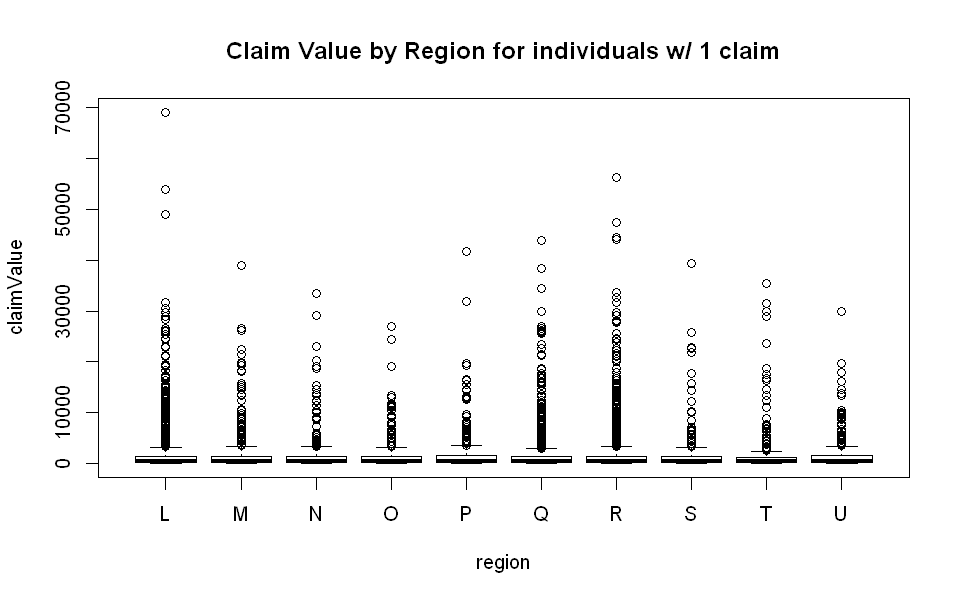

In [5]:
options(repr.plot.width=8, repr.plot.height=5)
boxplot(claimValue ~ region, data = db_one_claim,
     main="Claim Value by Region for individuals w/ 1 claim")

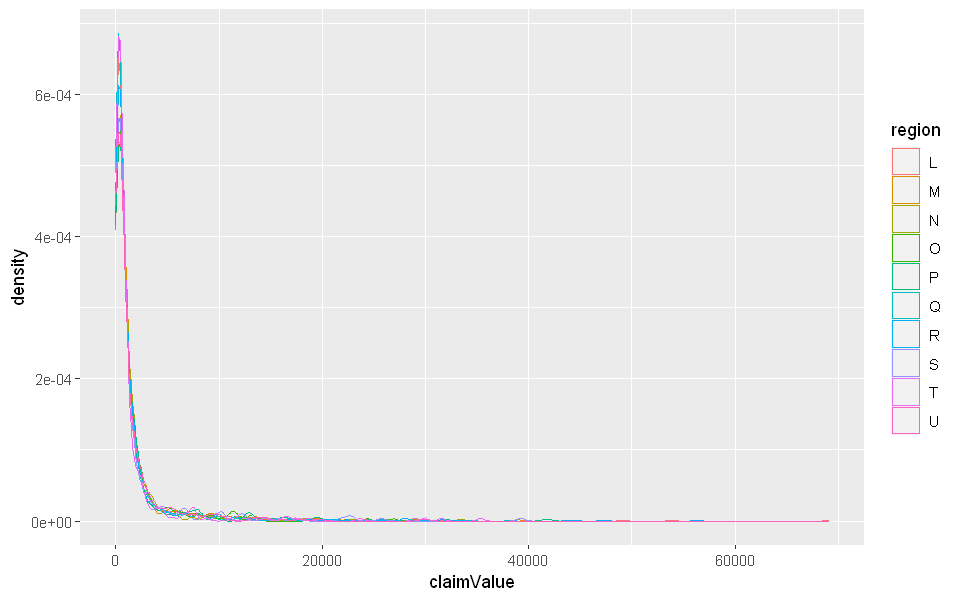

In [6]:
p2 <- ggplot(data=db_one_claim, aes(x=claimValue, color=region)) +
    geom_density(adjust=1.5, alpha=.4) 
p2

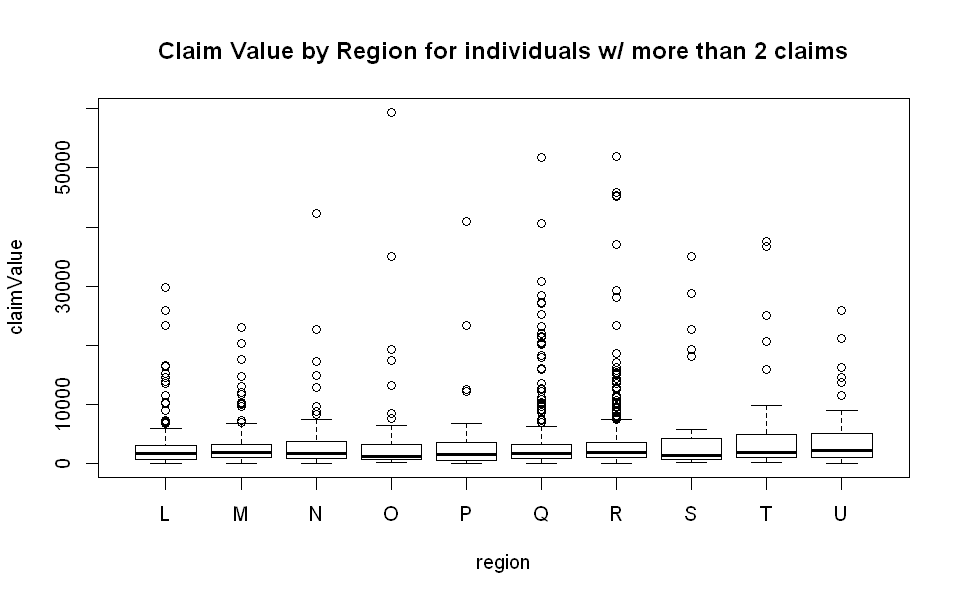

In [7]:
db_2_claims <- subset(db, claimNumber > 1)
boxplot(claimValue ~ region, data = db_2_claims,
     main="Claim Value by Region for individuals w/ more than 2 claims")

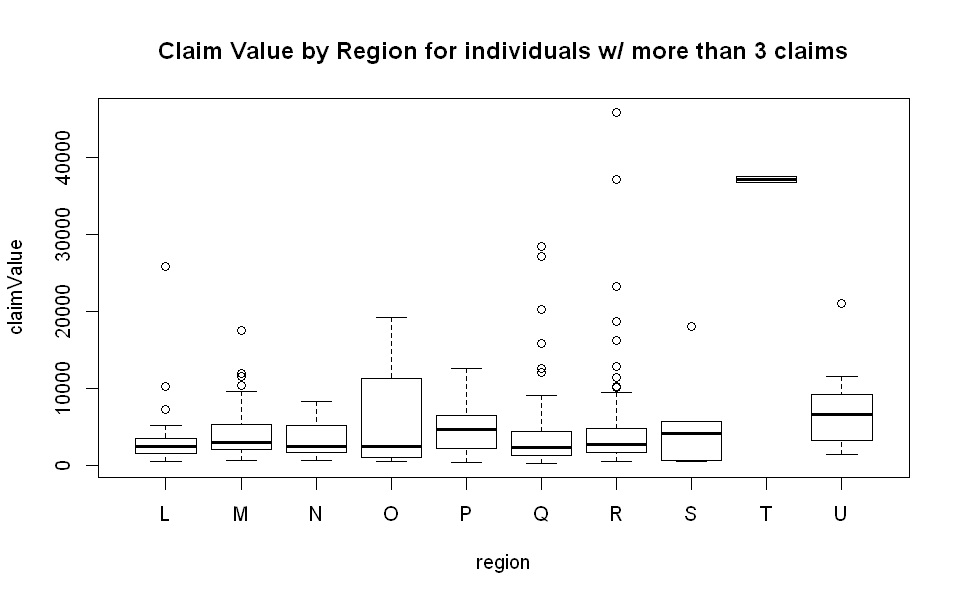

In [8]:
db_3_claims <- subset(db, claimNumber > 2)
boxplot(claimValue ~ region, data = db_3_claims,
     main="Claim Value by Region for individuals w/ more than 3 claims")

Let's create buckets for claims numbers (0,1, 2+)

In [9]:
db <- transform(db, catClaimNumber = ifelse(claimNumber < 2, as.factor(claimNumber), "p2"))

Warning message:
"Ignoring unknown parameters: adjust"

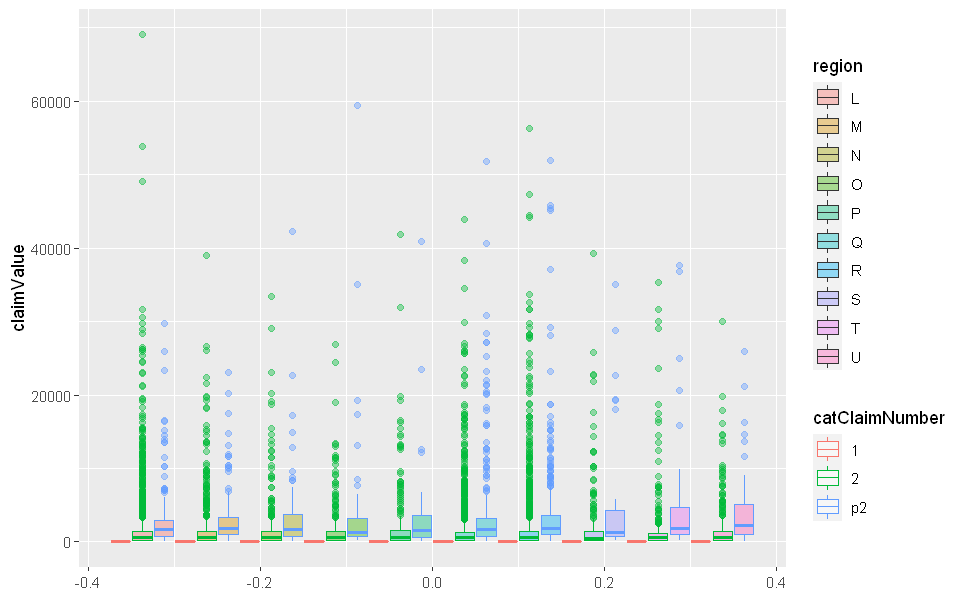

In [10]:
p2 <- ggplot(data=db, aes(x=claimValue, fill = region, color=catClaimNumber)) +
    geom_boxplot(adjust=1.5, alpha=.4) + coord_flip() +
    # facet_wrap(~region, strip.position = "bottom", scales = "free_x") +
    theme(panel.spacing = unit(0, "lines"), 
         strip.background = element_blank(),
         strip.placement = "outside")
p2
# boxplot(claimValue ~ region, data = db, color = db$catClaimNumber,
     # main="Claim Value by Region by categorical Claims number")

## Test du $\chi^2$ de contingence entre montants des sinistres et région

In [11]:
(tc <- table(db$catClaims, db$region))

        
             L     M     N     O     P     Q     R     S     T     U
  p10000    84    33    21    17    18    78    97    20    18    16
  u1000    368   192   105    78    84   458   395    69    84    80
  u10000   124    71    35    27    27   140   153    24    24    39
  u1500    182   109    58    48    30   256   235    32    40    43
  u2000    119    60    39    19    34   146   146    16    15    23
  u4000    174   111    60    41    31   247   226    24    32    47
  u500   13182  3925  2839  2919  2954 12060  7840  2809  2911  2939

In [12]:
testchi2_claims_region <- chisq.test(tc)
chi2 <- as.numeric(testchi2_claims_region$statistic)

In [13]:
cramer=sqrt(chi2/(sum(tc)*min(nrow(tc)-1,ncol(tc)-1)))

In [14]:
chi2; cramer

[1] 489.2492

[1] 0.03686496

In [15]:
library(gplots)

Warning message:
"package 'gplots' was built under R version 3.6.3"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



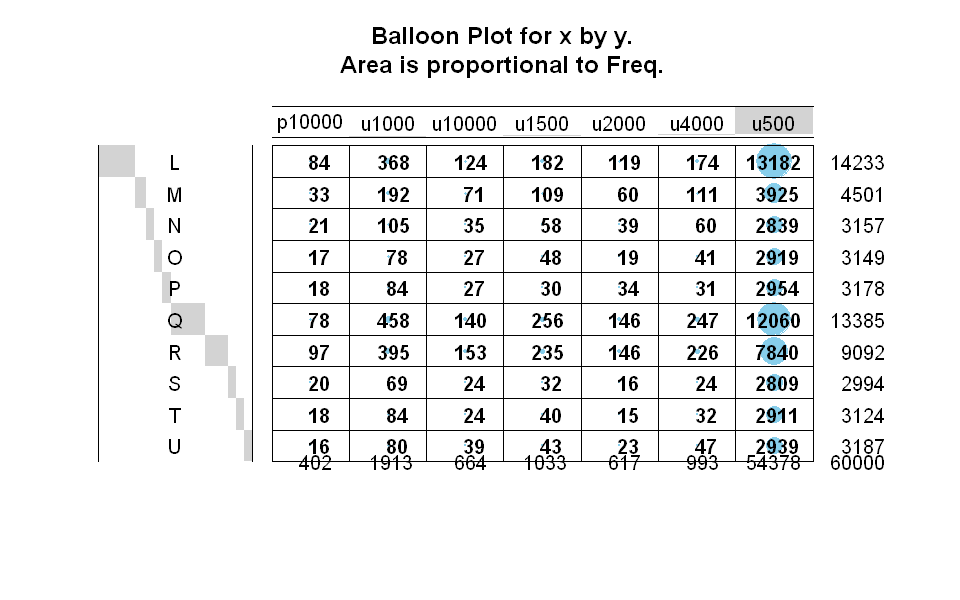

In [16]:
balloonplot(tc)


	Pearson's Chi-squared test

data:  tc
X-squared = 489.25, df = 54, p-value < 2.2e-16


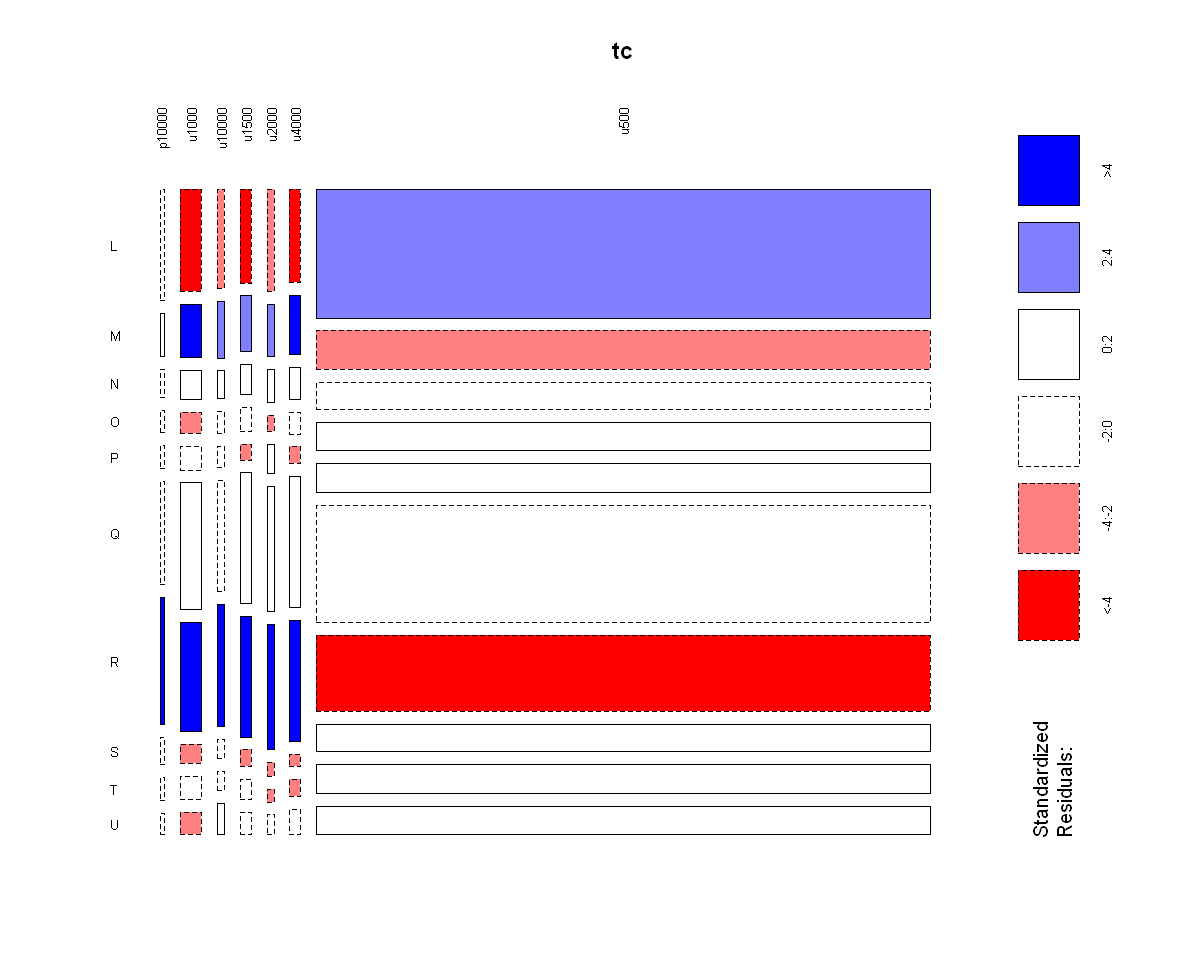

In [17]:
options(repr.plot.width=10, repr.plot.height=8)
(testchi2_claims_region <- chisq.test(tc))
mosaicplot(tc, shade=TRUE, las=2)

Bleu : Plus d’individus observé qu’attendu sous l’hypothèse d’absence de liens entre variables.(Excédent).  
Surreprésentativité des effectifs observés par rapport aux théoriques.  

• Rouge : Moins d’individus qu’attendu sous l’hypothèse d’absence de liens entre les variables.(Déficit).  
Sous représentativité des effectifs observés par rapport aux théoriques.  

• Table tte blanche: peu de chance que les variables soient liées.

## AFC sur table de contingence region / claimsValue

In [18]:
dftc <- data.frame(unclass(tc))
afc = dudi.coa(dftc,scannf=FALSE,nf=ncol(dftc)-1) 

In [19]:
summary(afc)

Class: coa dudi
Call: dudi.coa(df = dftc, scannf = FALSE, nf = ncol(dftc) - 1)

Total inertia: 0.008154

Eigenvalues:
      Ax1       Ax2       Ax3       Ax4       Ax5 
7.631e-03 2.445e-04 1.546e-04 8.771e-05 3.428e-05 

Projected inertia (%):
    Ax1     Ax2     Ax3     Ax4     Ax5 
93.5873  2.9990  1.8955  1.0756  0.4204 

Cumulative projected inertia (%):
    Ax1   Ax1:2   Ax1:3   Ax1:4   Ax1:5 
  93.59   96.59   98.48   99.56   99.98 

(Only 5 dimensions (out of 6) are shown)



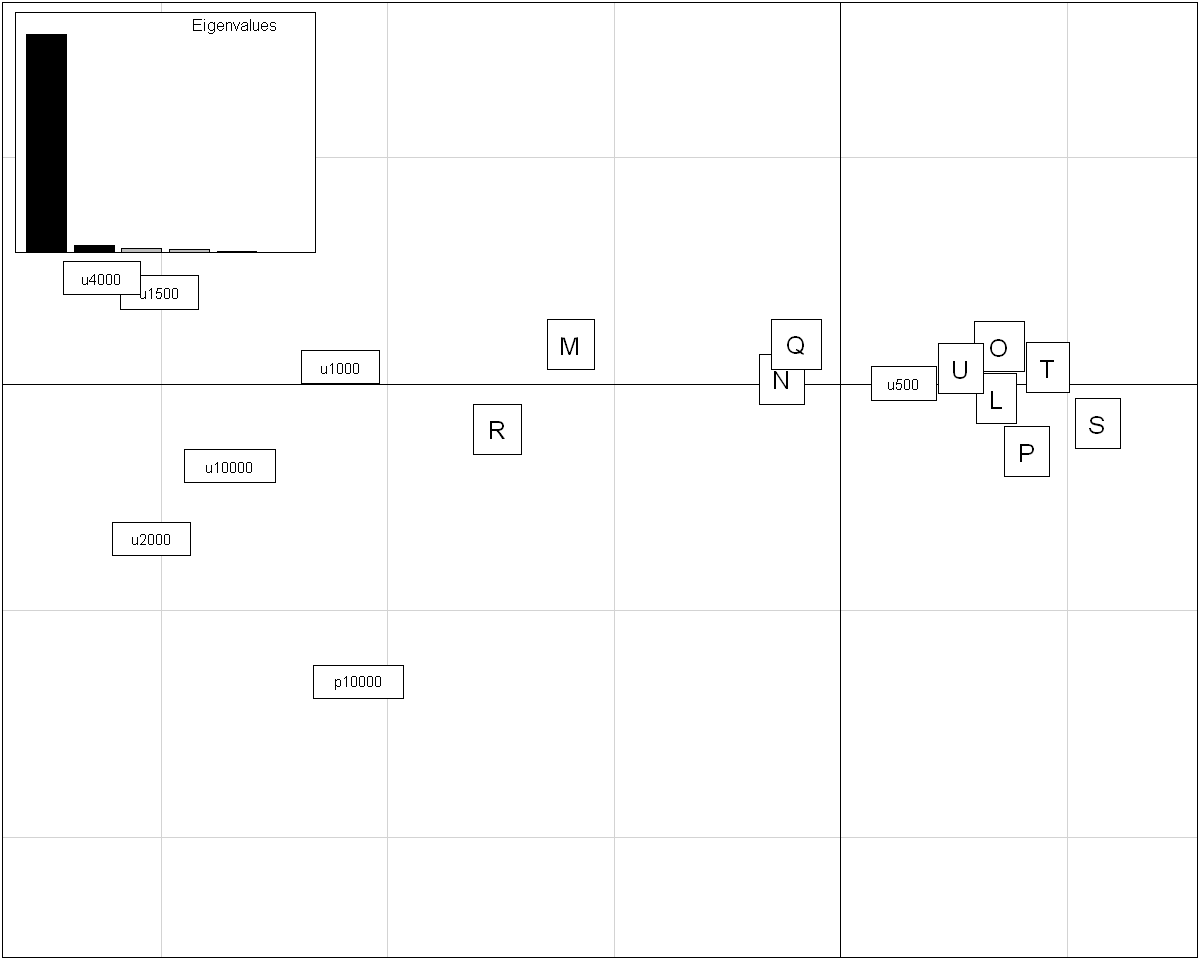

In [20]:
scatter(afc)

In [21]:
INERTIA = inertia.dudi(afc,row.inertia=TRUE,col.inertia=TRUE)
# Méthode 1: avec inertia.dudi
INERTIA$row.abs#multiplié par 1000 pour faciliter la lecture

,Axis1,Axis2,Axis3,Axis4,Axis5,Axis6
p10000,3.975966,47.29896640,16.226137951,15.46877658,4.825618,11.534534827
u1000,20.372730,0.74151838,2.383797107,13.72495189,58.283664,1.305005081
u10000,10.543684,5.91062380,20.516741506,46.73347830,7.586789,7.602016080
u1500,20.424079,11.58367218,6.482629219,13.09536456,14.054944,32.637643837
u2000,12.467964,19.58086148,54.285710755,2.10038495,5.127649,5.409096872
u4000,23.065821,14.85197876,0.098424688,8.82842875,9.990020,41.510326536
u500,9.149755,0.03237899,0.006558773,0.04861498,0.131315,0.001376767


In [22]:
INERTIA$row.rel

,Axis1,Axis2,Axis3,Axis4,Axis5,Axis6
p10000,-66.01863,-25.16706371,5.456758641,2.952112376,-0.359944131,4.549446e-02
u1000,-97.64232,0.11388535,-0.231394968,0.756053956,1.254856360,1.485716e-03
u10000,-89.95059,-1.61585360,3.544996093,-4.582398117,0.290755504,-1.540547e-02
u1500,-96.57701,1.75523226,0.620837870,0.711708165,-0.298551108,-3.665935e-02
u2000,-87.53532,-4.40531170,-7.719142501,-0.169488316,-0.161720238,-9.020844e-03
u4000,-97.32435,2.00813986,-0.008411092,-0.428143223,-0.189355197,4.160479e-02
u500,99.97466,0.01133707,-0.001451439,-0.006105252,-0.006445447,-3.573350e-06


## Test du $\chi^2$ de contingence entre montants des sinistres et région pour claimNumber = 1

In [23]:
(tc <- table(db_one_claim$catClaims, db_one_claim$region))

        
           L   M   N   O   P   Q   R   S   T   U
  p10000  71  21  16  12  14  49  66  14  13  10
  u1000  328 164  84  64  74 387 325  58  75  72
  u10000 100  47  18  21  22  97  85  18  15  27
  u1500  160  81  45  34  28 195 160  26  32  33
  u2000   84  42  32  15  28 105 103  14  10  22
  u4000  132  65  38  33  25 152 113  20  23  39
  u500   749 292 184 148 161 845 646 136 148 189


	Pearson's Chi-squared test

data:  tc
X-squared = 55.734, df = 54, p-value = 0.4094


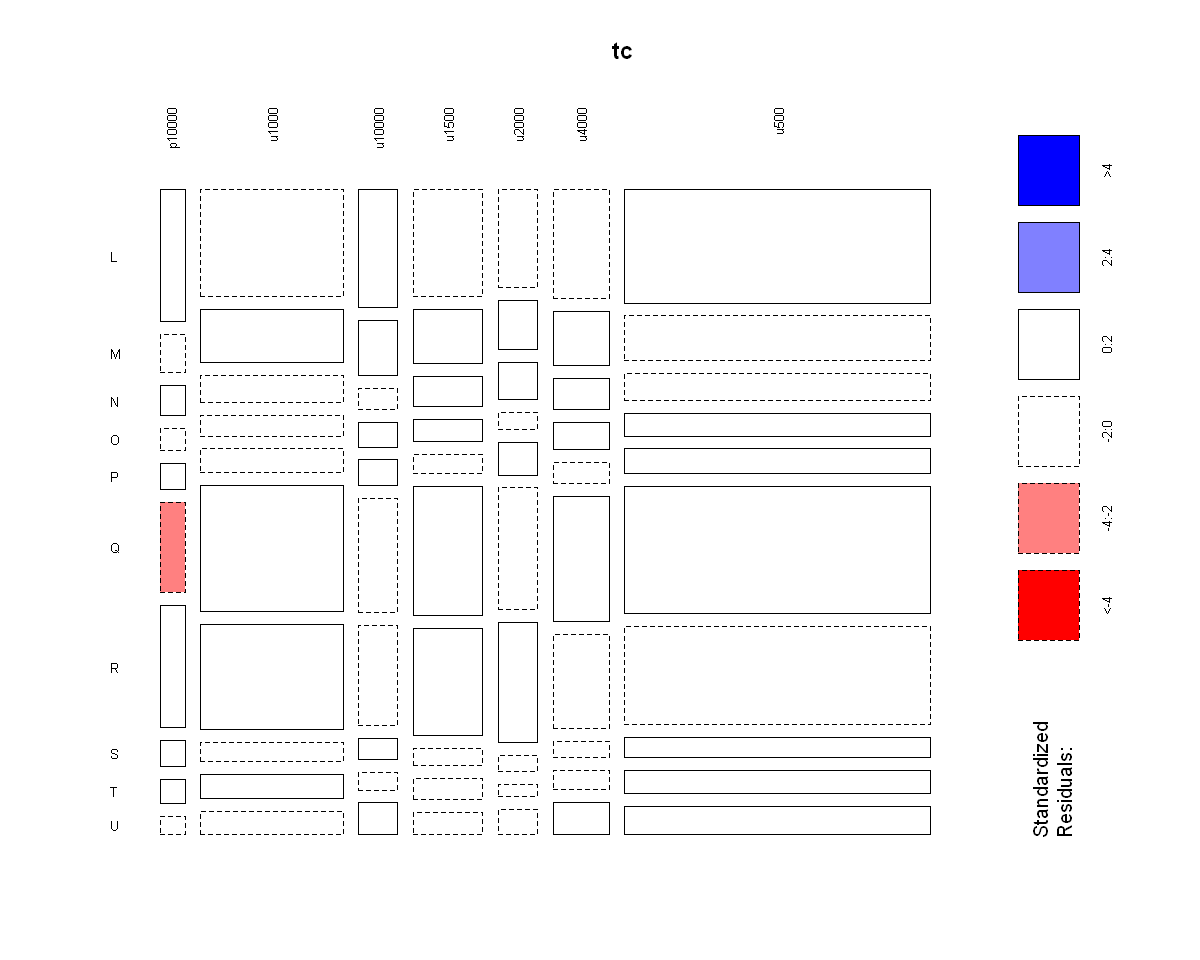

In [24]:
(testchi2_claims_region <- chisq.test(tc))
mosaicplot(tc, shade=TRUE, las=2)

p-value > 5% -> on rejette H0, les variables ne sont probablement pas liées

## Test du $\chi^2$ de contingence entre montants des sinistres et région pour claimNumber > 1

In [25]:
(tc <- table(db_2_claims$catClaims, db_2_claims$region))

        
           L   M   N   O   P   Q   R   S   T   U
  p10000  13  12   5   5   4  29  31   6   5   6
  u1000   40  28  21  14  10  71  70  11   9   8
  u10000  24  24  17   6   5  43  68   6   9  12
  u1500   22  28  13  14   2  61  75   6   8  10
  u2000   35  18   7   4   6  41  43   2   5   1
  u4000   42  46  22   8   6  95 113   4   9   8
  u500    26  19  12  10   8  45  38   4   3   6

Warning message in chisq.test(tc):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  tc
X-squared = 68.062, df = 54, p-value = 0.09447


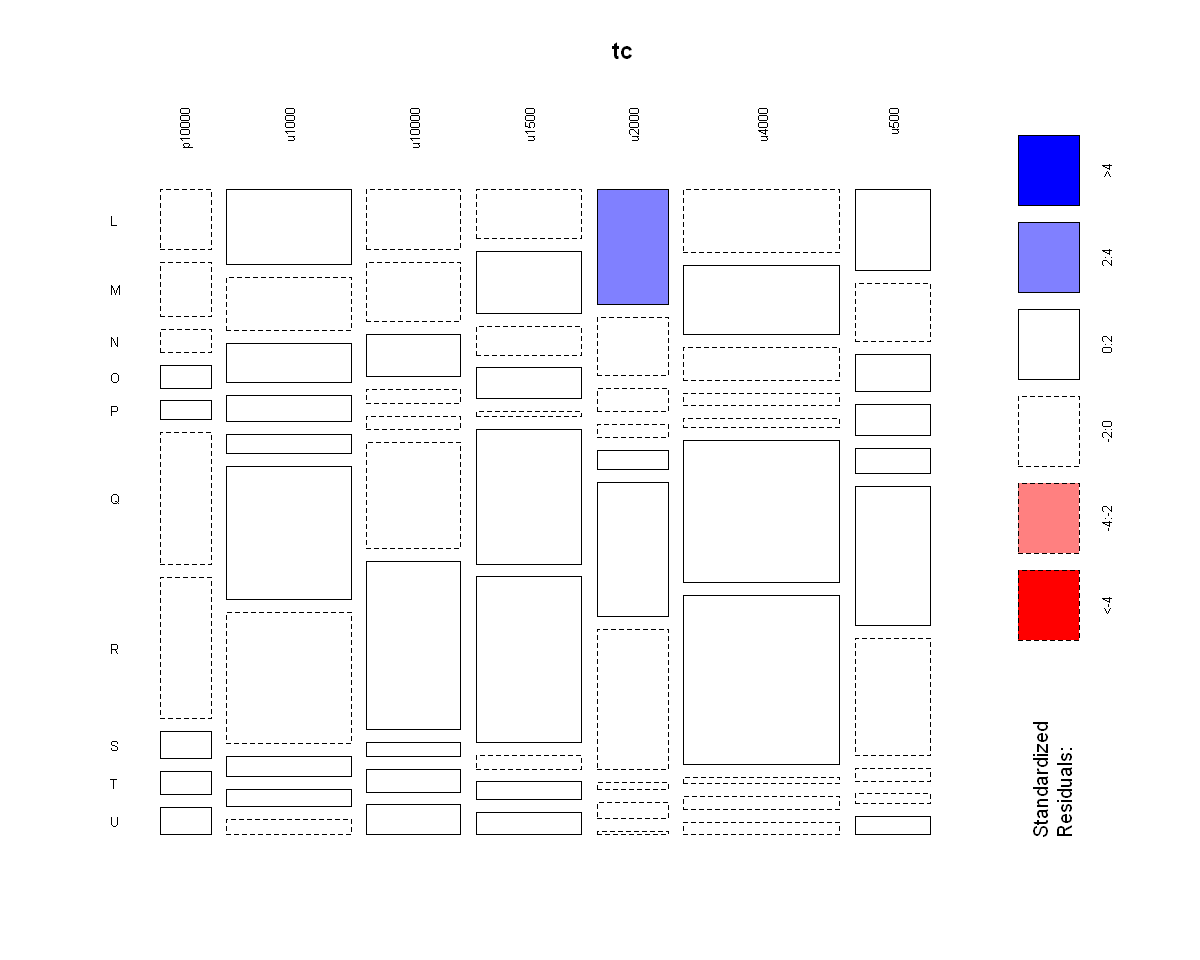

In [26]:
(testchi2_claims_region <- chisq.test(tc))
mosaicplot(tc, shade=TRUE, las=2)

Il n'y a donc pas de lien entre une sur sinistralité par zones géographiques pour les individus ayant au moins un sinistre. En revanche, en prenant en compte tout les individus (y compris non sinistré), il existe un lien, comme le témoigne le premier mosaïc plotavec une p-value << 5%

## Test du $\chi²$ entre catégories de nombre de sinistre et zone géographiques

In [27]:
(tc <- table(db$region, db$catClaimNumber))

   
        1     2    p2
  L 12407  1624   202
  M  3614   712   175
  N  2643   417    97
  O  2761   327    61
  P  2785   352    41
  Q 11170  1830   385
  R  7156  1498   438
  S  2669   286    39
  T  2760   316    48
  U  2744   392    51


	Pearson's Chi-squared test

data:  tc
X-squared = 660.83, df = 18, p-value < 2.2e-16


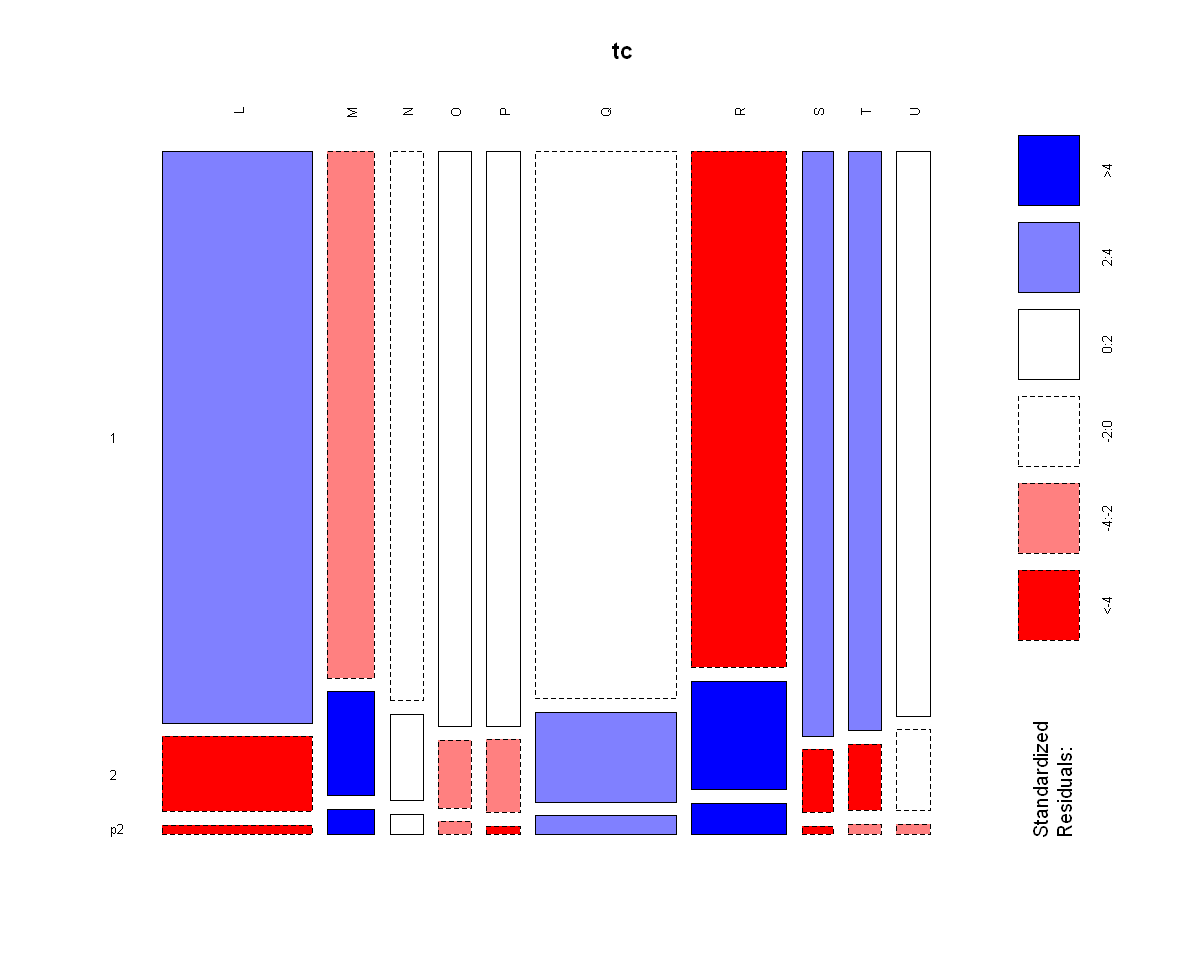

In [28]:
(testchi2_claims_region <- chisq.test(tc))
mosaicplot(tc, shade=TRUE, las=2)

Poursuivons sur une AFC

In [29]:
dftc <- data.frame(unclass(tc))
afc = dudi.coa(dftc,scannf=FALSE,nf=ncol(dftc)-1) 

Class: coa dudi
Call: dudi.coa(df = dftc, scannf = FALSE, nf = ncol(dftc) - 1)

Total inertia: 0.01101

Eigenvalues:
      Ax1       Ax2 
0.0107990 0.0002149 

Projected inertia (%):
    Ax1     Ax2 
 98.049   1.951 

Cumulative projected inertia (%):
    Ax1   Ax1:2 
  98.05  100.00 



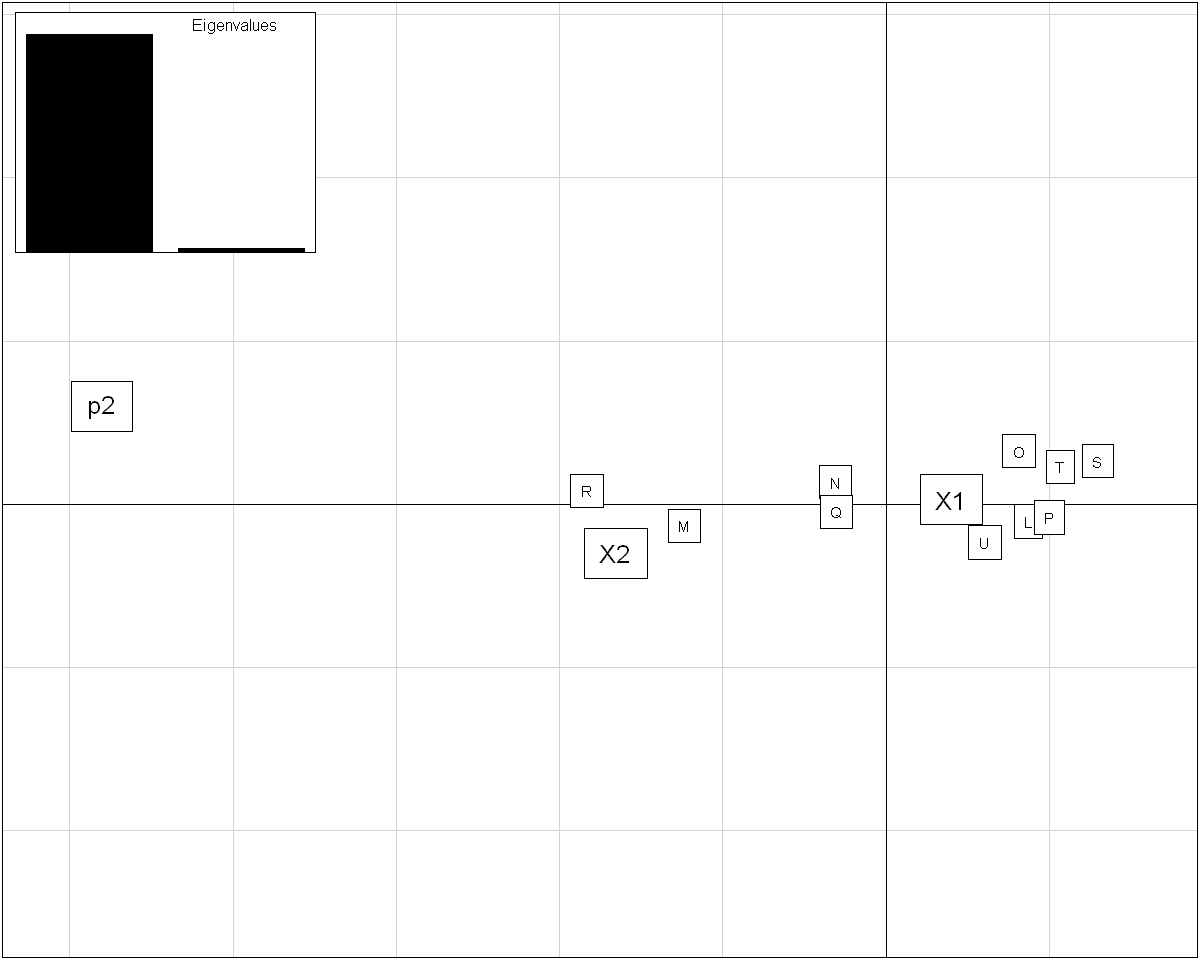

In [30]:
summary(afc)
scatter(afc)